In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

|label|class|
|-----|-----|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [2]:
fashion = cv2.imread('figures/fashion.png', 0)

In [3]:
cells = [np.hsplit(row, 30) for row in np.vsplit(fashion, 30)]

In [4]:
features = np.array(cells, np.float32)

In [5]:
train_features = features[:, :14].reshape(-1, (28 * 28))
test_features = features[:, 14:28].reshape(-1, (28 * 28))

In [6]:
k = np.arange(10)
train_labels = np.repeat(k, 42)[:, np.newaxis]
test_labels = train_labels.copy()

In [7]:
knn = cv2.ml.KNearest_create()

In [8]:
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [9]:
ret, result, neighbors, dist = knn.findNearest(test_features, k=5)

In [10]:
matches = np.equal(result, test_labels).astype(np.int)
correct = np.count_nonzero(matches)
accuracy = correct * 100.00 / result.size
print('accuracy : {}'.format(accuracy))

accuracy : 69.52380952380952


In [11]:
train_labels.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,

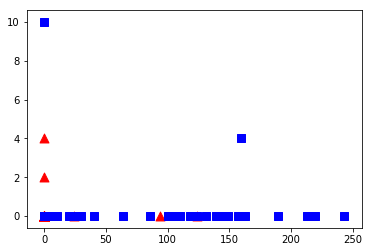

In [12]:
top = train_features[train_labels.ravel() == 0]
plt.scatter(top[:, 250], top[:, 780], 80, 'r', '^')
boot = train_features[train_labels.ravel() == 9]
plt.scatter(boot[:, 250], boot[:, 780], 80, 'b', 's')

plt.show()